In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# USER ACTIVITY

In [20]:
df_userAct = pd.read_csv("UserActivity.csv")
df_userAct

,User_ID,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,ID_RAO7ABPO,comp_ID_N5MO,10:49:58,1,11,23
1,ID_RAO7ABPO,comp_ID_N5MO,12:08:03,1,11,23
2,ID_RAO7ABPO,comp_ID_N5MO,12:09:14,1,11,23
3,ID_RAO7ABPO,comp_ID_N5MO,12:11:16,1,11,23
4,ID_RAO7ABPO,comp_ID_N5MO,12:32:13,1,11,23
...,...,...,...,...,...,...
234650,ID_CF3I4GSJ,job_ID_5ONI,08:32:58,1,4,15
234651,ID_92GNK8VB,job_ID_5ONI,17:53:54,1,4,11
234652,ID_YP6RVLKJ,job_ID_5ONI,12:46:38,1,4,19
234653,ID_9GFJ437M,job_ID_5ONI,22:12:10,1,4,7


In [31]:
df_userAct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234655 entries, 0 to 234654
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   User_ID                234655 non-null  string
 1   Title                  234655 non-null  object
 2   datetime time          234655 non-null  object
 3   datetime Month         234655 non-null  string
 4   datetime Day_of_month  234655 non-null  int64 
dtypes: int64(1), object(2), string(2)
memory usage: 9.0+ MB


In [32]:
df = df_userAct[(df_userAct["datetime Month"]== '3') | (df_userAct["datetime Month"]== '4')]

In [ ]:
df

In [35]:
len(df["User_ID"].unique())

2718

In [22]:
len(pd.unique(df_userAct['User_ID']))

7698

In [23]:
len(pd.unique(df_userAct['datetime Year']))

1

In [24]:
df_userAct.drop('datetime Year', inplace=True, axis=1)

In [25]:
df_userAct["User_ID"] = df_userAct["User_ID"].astype("string")
df_userAct["datetime Month"] = df_userAct["datetime Month"].astype("string")

In [26]:
new = df_userAct["datetime Month"].copy()
df_userAct["User_ID"] = df_userAct["User_ID"].str.cat(new, sep ="_Month_")

In [9]:
df_userAct.drop('datetime Month', inplace=True, axis=1)

In [10]:
df_temp1 = df_userAct.groupby('User_ID').max() 

In [11]:
df_temp2 = df_userAct.groupby('User_ID').sum() 

In [12]:
df_temp3 = df_userAct.groupby('User_ID').count() 

In [13]:
df_temp = df_temp1

In [14]:
df_temp["datetime Day_of_month"] = df_temp1["datetime Day_of_month"]

In [15]:
df_temp["count_UA"] = df_temp3["datetime time"]

In [16]:
df_userAct = df_temp 

In [17]:
df_userAct.drop('Title', inplace=True, axis=1)

In [18]:
df_userAct

,datetime time,datetime Day_of_month,count_UA
User_ID,,,
ID_00E5OHGR_Month_3,11:10:23,15,25
ID_00ETFE7J_Month_3,23:41:28,13,16
ID_00HJDB09_Month_2,09:02:09,11,21
ID_00V7K62T_Month_1,09:43:13,15,1
ID_00V7K62T_Month_11,07:47:32,16,7
...,...,...,...
ID_ZZDBLYS5_Month_2,15:13:55,12,15
ID_ZZQK0LU6_Month_1,11:38:50,15,26
ID_ZZT2KLLN_Month_3,05:23:57,5,10


In [ ]:
df_userAct[(df_userAct["Month"]== 3) | (df["Month"]== 4)]

# DISCUSSIONS

In [19]:
df_disc = pd.read_csv("Discussion.csv")

In [20]:
df_disc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Competition ID           956 non-null    object 
 1   Personal                 956 non-null    int64  
 2   Theme                    108 non-null    float64
 3   Disc_ID                  956 non-null    object 
 4   User_ID                  956 non-null    object 
 5   Created At time          956 non-null    object 
 6   Created At Year          956 non-null    int64  
 7   Created At Month         956 non-null    int64  
 8   Created At Day_of_month  956 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 67.3+ KB


In [21]:
df_disc

,Competition ID,Personal,Theme,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,GeneralDiscussion,1,NaN,ID_0BK7TH,ID_B66PZQQP,19:48:26.862175,1,12,27
1,GeneralDiscussion,1,NaN,ID_ZFJ9J7,ID_5Y4QLJNC,09:37:52.039526,1,12,20
2,GeneralDiscussion,1,NaN,ID_ME45XX,ID_CQ02RGX8,17:50:33.894800,1,2,9
3,ID_WOVD,1,NaN,ID_T2Q4GB,ID_CQ02RGX8,07:57:55.178845,1,2,10
4,GeneralDiscussion,1,NaN,ID_251XVV,ID_XICHYIPJ,19:56:13.041893,1,12,27
...,...,...,...,...,...,...,...,...,...
951,GeneralDiscussion,1,NaN,ID_N2NU2T,ID_ED8SPMFX,03:23:30.178446,1,3,23
952,GeneralDiscussion,1,NaN,ID_960KNM,ID_0TD2K7VV,10:11:04.131376,1,4,16
953,ID_M7TY,0,3.0,ID_J5IASR,ID_R7WXMZ7I,17:40:14.006176,1,1,5
954,ID_HCST,1,NaN,ID_8Q8LJJ,ID_6WFBO49L,16:18:42.357376,1,3,23


In [22]:
len(pd.unique(df_disc['User_ID']))

691

In [23]:
len(pd.unique(df_disc['Created At Year']))

1

In [24]:
df_disc.drop('Created At Year', inplace=True, axis=1)

In [25]:
df_disc["User_ID"] = df_disc["User_ID"].astype("string")
df_disc["Created At Month"] = df_disc["Created At Month"].astype("string")

In [26]:
new = df_disc["Created At Month"].copy()
df_disc["User_ID"] = df_disc["User_ID"].str.cat(new, sep ="_Month_")

In [27]:
df_disc.drop('Created At Month', inplace=True, axis=1)

In [28]:
pd.unique(df_disc['Theme'])

array([nan,  4.,  1.,  3.,  5.,  2.])

# COMMENTS

In [29]:
df_com = pd.read_csv("Comments.csv")

In [30]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Disc_ID                  2788 non-null   object
 1   User_ID                  2788 non-null   object
 2   Created At time          2788 non-null   object
 3   Created At Year          2788 non-null   int64 
 4   Created At Month         2788 non-null   int64 
 5   Created At Day_of_month  2788 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 130.8+ KB


In [31]:
df_com

,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_PTU0JO,ID_8BQTNGYG,01:18:53.960347,1,2,18
1,ID_FWGIPM,ID_8BQTNGYG,00:50:03.299989,1,2,14
2,ID_V8QUAX,ID_8BQTNGYG,00:46:57.298751,1,2,14
3,ID_WWAY33,ID_8BQTNGYG,02:53:44.504614,1,1,20
4,ID_EWT1OB,ID_8BQTNGYG,06:53:26.903374,1,2,4
...,...,...,...,...,...,...
2783,ID_O24SU4,ID_SC59RO43,11:03:52.575030,1,4,18
2784,ID_62W6UH,ID_BX3JR1XA,20:51:39.583262,1,4,20
2785,ID_N1M40F,ID_UA02ZSWR,09:27:21.364650,1,4,19
2786,ID_N1M40F,ID_XBQ1LQ7B,22:36:29.720601,1,4,19


In [32]:
len(pd.unique(df_com['User_ID']))

759

In [33]:
len(pd.unique(df_com['Created At Year']))

1

In [34]:
df_com.drop('Created At Year', inplace=True, axis=1)

In [35]:
df_com["User_ID"] = df_com["User_ID"].astype("string")
df_com["Created At Month"] = df_com["Created At Month"].astype("string")

In [36]:
new = df_com["Created At Month"].copy()
df_com["User_ID"] = df_com["User_ID"].str.cat(new, sep ="_Month_")

In [37]:
df_com.drop('Created At Month', inplace=True, axis=1)

# MERGE 1

In [38]:
result1 = pd.merge(df_disc, df_com, how="outer", on=['User_ID', 'Disc_ID'])

In [39]:
result1

,Competition ID,Personal,Theme,Disc_ID,User_ID,Created At time_x,Created At Day_of_month_x,Created At time_y,Created At Day_of_month_y
0,GeneralDiscussion,1.0,NaN,ID_0BK7TH,ID_B66PZQQP_Month_12,19:48:26.862175,27.0,NaN,NaN
1,GeneralDiscussion,1.0,NaN,ID_ZFJ9J7,ID_5Y4QLJNC_Month_12,09:37:52.039526,20.0,NaN,NaN
2,GeneralDiscussion,1.0,NaN,ID_ME45XX,ID_CQ02RGX8_Month_2,17:50:33.894800,9.0,NaN,NaN
3,ID_WOVD,1.0,NaN,ID_T2Q4GB,ID_CQ02RGX8_Month_2,07:57:55.178845,10.0,19:46:53.564412,11.0
4,GeneralDiscussion,1.0,NaN,ID_251XVV,ID_XICHYIPJ_Month_12,19:56:13.041893,27.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3415,NaN,NaN,NaN,ID_5XKX1Y,ID_F5IWLL5N_Month_4,NaN,NaN,11:05:04.354654,16.0
3416,NaN,NaN,NaN,ID_5XKX1Y,ID_F5IWLL5N_Month_4,NaN,NaN,11:04:00.980436,16.0
3417,NaN,NaN,NaN,ID_5XKX1Y,ID_78I8ZFGC_Month_4,NaN,NaN,08:15:37.567408,19.0
3418,NaN,NaN,NaN,ID_N1M40F,ID_UA02ZSWR_Month_4,NaN,NaN,09:27:21.364650,19.0


In [40]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 0 to 3419
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Competition ID             1129 non-null   object 
 1   Personal                   1129 non-null   float64
 2   Theme                      171 non-null    float64
 3   Disc_ID                    3420 non-null   object 
 4   User_ID                    3420 non-null   string 
 5   Created At time_x          1129 non-null   object 
 6   Created At Day_of_month_x  1129 non-null   float64
 7   Created At time_y          2788 non-null   object 
 8   Created At Day_of_month_y  2788 non-null   float64
dtypes: float64(4), object(4), string(1)
memory usage: 267.2+ KB


# COMPETITIONS

In [41]:
df_comp = pd.read_csv("Competition.csv")

In [42]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FeatureA                 236 non-null    object 
 1   FeatureB                 236 non-null    object 
 2   FeatureC                 188 non-null    float64
 3   FeatureD                 236 non-null    int64  
 4   FeatureE                 236 non-null    int64  
 5   SecretCode               236 non-null    int64  
 6   FeatureF                 236 non-null    object 
 7   FeatureG                 236 non-null    object 
 8   FeatureH                 236 non-null    object 
 9   FeatureI                 178 non-null    float64
 10  Country_ID               114 non-null    object 
 11  Comp_ID                  236 non-null    object 
 12  End Time time            213 non-null    object 
 13  End Time Year            213 non-null    float64
 14  End Time Month           2

In [43]:
df_comp

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,03GB,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,1SUM,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,D73V,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[1],"[5, 6]",9.0,1,1,0,[7],[],[7],9.0,OTOG,ID_A2FN,00:00:00,3.0,10.0,2.0,00:00:00,4,6,29
4,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_X0PD,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,[1],[],20.0,1,2,0,"[1, 5]",[5],[1],20.0,NaN,ID_PNHR,23:59:00,2.0,4.0,19.0,06:00:00,2,1,25
232,[1],[7],4.0,1,1,0,[1],[5],[1],4.0,NaN,ID_AS79,23:59:00,1.0,4.0,25.0,06:00:00,1,1,24
233,[1],[],NaN,0,2,1,[1],[3],[],NaN,0FT1,ID_M3G0,17:00:00,1.0,10.0,20.0,08:57:00,1,10,19
234,[1],[],2.0,0,2,0,[3],[3],[2],2.0,OTOG,ID_8DGC,23:59:00,1.0,4.0,4.0,11:00:00,1,4,2


In [44]:
len(pd.unique(df_comp['Comp_ID']))

236

In [45]:
len(pd.unique(df_comp['Start Time Year']))

5

# COMPETITION PARTICIPATION

In [46]:
df_compP = pd.read_csv("CompetitionPartipation.csv")

In [47]:
df_compP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Competition ID               5625 non-null   object
 1   Participant Type             5625 non-null   int64 
 2   Successful Submission Count  1124 non-null   object
 3   User_ID                      5625 non-null   object
 4   Created At time              5625 non-null   object
 5   Created At Year              5625 non-null   int64 
 6   Created At Month             5625 non-null   int64 
 7   Created At Day_of_month      5625 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 351.7+ KB


In [48]:
df_compP

,Competition ID,Participant Type,Successful Submission Count,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_IVH9,1,NaN,ID_XXWYR8KC,19:38:04.689865,1,11,20
1,ID_540G,1,NaN,ID_XXWYR8KC,19:38:04.670583,1,11,20
2,ID_BARV,1,NaN,ID_XXWYR8KC,12:06:55.884320,1,12,17
3,ID_0D02,1,count 10,ID_XXWYR8KC,11:24:04.239058,1,12,6
4,ID_IV5D,1,NaN,ID_8RNJ6AWC,15:25:34.162971,1,12,8
...,...,...,...,...,...,...,...,...
5620,ID_G5IQ,1,NaN,ID_2DGGDVLC,15:33:39.507041,1,4,7
5621,ID_84NC,1,NaN,ID_2DGGDVLC,15:34:15.045823,1,4,7
5622,ID_LFJT,1,NaN,ID_2DGGDVLC,15:46:23.330890,1,4,7
5623,ID_CNBR,1,NaN,ID_JZ6S41Q9,11:23:59.382726,1,4,5


In [49]:
len(pd.unique(df_compP['User_ID']))

3649

In [50]:
len(pd.unique(df_compP['Created At Year']))

1

In [51]:
df_compP.drop('Created At Year', inplace=True, axis=1)

In [52]:
df_compP.rename(columns={'Competition ID': 'Comp_ID'},  inplace = True)

In [53]:
df_compP["User_ID"] = df_compP["User_ID"].astype("string")
df_compP["Created At Month"] = df_compP["Created At Month"].astype("string")

In [54]:
new = df_compP["Created At Month"].copy()
df_compP["User_ID"] = df_compP["User_ID"].str.cat(new, sep ="_Month_")

In [55]:
df_compP.drop('Created At Month', inplace=True, axis=1)

In [ ]:
df_compP.info()

In [ ]:
df_compP

# MERGE 2

In [56]:
result2 = pd.merge(df_compP, df_comp, how="outer", on= 'Comp_ID')

In [57]:
result2 = result2[result2['User_ID'].notna()]

In [58]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 0 to 5624
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Comp_ID                      5625 non-null   object 
 1   Participant Type             5625 non-null   float64
 2   Successful Submission Count  1124 non-null   object 
 3   User_ID                      5625 non-null   string 
 4   Created At time              5625 non-null   object 
 5   Created At Day_of_month      5625 non-null   float64
 6   FeatureA                     5625 non-null   object 
 7   FeatureB                     5625 non-null   object 
 8   FeatureC                     3581 non-null   float64
 9   FeatureD                     5625 non-null   int64  
 10  FeatureE                     5625 non-null   int64  
 11  SecretCode                   5625 non-null   int64  
 12  FeatureF                     5625 non-null   object 
 13  FeatureG          

In [59]:
result2

,Comp_ID,Participant Type,Successful Submission Count,User_ID,Created At time,Created At Day_of_month,FeatureA,FeatureB,FeatureC,FeatureD,...,FeatureI,Country_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,ID_IVH9,1.0,NaN,ID_XXWYR8KC_Month_11,19:38:04.689865,20.0,[1],"[12, 16]",NaN,1,...,NaN,NaN,00:00:00,3.0,9.0,24.0,00:00:00,4,6,25
1,ID_IVH9,1.0,NaN,ID_9GFJ437M_Month_4,21:15:54.617702,7.0,[1],"[12, 16]",NaN,1,...,NaN,NaN,00:00:00,3.0,9.0,24.0,00:00:00,4,6,25
2,ID_IVH9,1.0,NaN,ID_RB0UZ5HG_Month_11,16:43:35.871761,30.0,[1],"[12, 16]",NaN,1,...,NaN,NaN,00:00:00,3.0,9.0,24.0,00:00:00,4,6,25
3,ID_IVH9,1.0,NaN,ID_4WIXUBUI_Month_11,17:55:40.888019,23.0,[1],"[12, 16]",NaN,1,...,NaN,NaN,00:00:00,3.0,9.0,24.0,00:00:00,4,6,25
4,ID_IVH9,1.0,NaN,ID_385A35BC_Month_11,18:30:49.827315,30.0,[1],"[12, 16]",NaN,1,...,NaN,NaN,00:00:00,3.0,9.0,24.0,00:00:00,4,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,ID_1HUO,1.0,NaN,ID_G3UDNLXT_Month_3,15:59:16.861378,10.0,[2],"[14, 8]",15.0,1,...,15.0,NaN,23:59:00,2.0,3.0,29.0,06:00:00,2,12,28
5621,ID_ZN92,1.0,NaN,ID_2B8G6G89_Month_11,06:38:13.766016,17.0,"[2, 7]",[],9.0,1,...,9.0,NaN,00:00:00,3.0,11.0,20.0,00:00:00,3,8,16
5622,ID_EPVA,1.0,NaN,ID_1USABYQK_Month_2,10:25:06.366740,6.0,"[1, 6]",[],NaN,1,...,NaN,NaN,23:59:00,2.0,3.0,15.0,06:00:00,2,11,16
5623,ID_7079,1.0,NaN,ID_T4SPV3PY_Month_4,04:23:17.682554,11.0,"[7, 3, 2]",[15],10.0,1,...,10.0,03GB,23:59:00,3.0,6.0,29.0,06:00:00,3,4,11


# USERS

In [60]:
df_user = pd.read_csv('Users.csv')

In [61]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FeatureY                 8936 non-null   int64 
 1   FeatureX                 8936 non-null   int64 
 2   User_ID                  8936 non-null   object
 3   Countries_ID             5322 non-null   object
 4   Created At time          8936 non-null   object
 5   Created At Year          8936 non-null   int64 
 6   Created At Month         8936 non-null   int64 
 7   Created At Day_of_month  8936 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 558.6+ KB


In [62]:
df_user

,FeatureY,FeatureX,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,0,0,ID_JT45778G,X9GR,12:52:28.115008,1,12,14
1,0,0,ID_JST2E746,NaN,07:47:45.923194,1,4,21
2,0,0,ID_JBATRARU,NaN,08:36:46.773862,1,4,21
3,0,0,ID_M0NYS4PB,NaN,11:33:40.628926,1,4,20
4,0,0,ID_OMAOEER0,NaN,16:28:35.956023,1,2,31
...,...,...,...,...,...,...,...,...
8931,0,0,ID_R4PDD7MY,UKC2,03:59:15.620697,1,4,10
8932,0,0,ID_CF1OPNQ5,ME75,21:25:16.299368,1,12,29
8933,0,0,ID_7PSNGF84,H801,10:03:43.201075,1,1,18
8934,1,0,ID_ZUKI8HI5,E3V2,18:00:54.828074,1,2,1


In [63]:
len(pd.unique(df_user['User_ID']))

8936

In [64]:
len(pd.unique(df_user['Created At Year']))

1

In [65]:
df_user.drop('Created At Year', inplace=True, axis=1)

In [66]:
df_user["User_ID"] = df_user["User_ID"].astype("string")
df_user["Created At Month"] = df_user["Created At Month"].astype("string")

In [67]:
new = df_user["Created At Month"].copy()
df_user["User_ID"] = df_user["User_ID"].str.cat(new, sep ="_Month_")

In [68]:
df_user.drop('Created At Month', inplace=True, axis=1)

In [69]:
df_user

,FeatureY,FeatureX,User_ID,Countries_ID,Created At time,Created At Day_of_month
0,0,0,ID_JT45778G_Month_12,X9GR,12:52:28.115008,14
1,0,0,ID_JST2E746_Month_4,NaN,07:47:45.923194,21
2,0,0,ID_JBATRARU_Month_4,NaN,08:36:46.773862,21
3,0,0,ID_M0NYS4PB_Month_4,NaN,11:33:40.628926,20
4,0,0,ID_OMAOEER0_Month_2,NaN,16:28:35.956023,31
...,...,...,...,...,...,...
8931,0,0,ID_R4PDD7MY_Month_4,UKC2,03:59:15.620697,10
8932,0,0,ID_CF1OPNQ5_Month_12,ME75,21:25:16.299368,29
8933,0,0,ID_7PSNGF84_Month_1,H801,10:03:43.201075,18
8934,1,0,ID_ZUKI8HI5_Month_2,E3V2,18:00:54.828074,1


# MERGE 3

In [70]:
result3 = pd.merge(df_userAct, df_user, how="outer", on= 'User_ID')

In [71]:
result3

,User_ID,datetime time,datetime Day_of_month,count_UA,FeatureY,FeatureX,Countries_ID,Created At time,Created At Day_of_month
0,ID_00E5OHGR_Month_3,11:10:23,15.0,25.0,0.0,0.0,ISIQ,08:29:49.568521,11.0
1,ID_00ETFE7J_Month_3,23:41:28,13.0,16.0,0.0,0.0,NaN,20:53:04.318404,12.0
2,ID_00HJDB09_Month_2,09:02:09,11.0,21.0,1.0,0.0,81UD,06:51:48.183997,9.0
3,ID_00V7K62T_Month_1,09:43:13,15.0,1.0,NaN,NaN,NaN,NaN,NaN
4,ID_00V7K62T_Month_11,07:47:32,16.0,7.0,0.0,0.0,GYYX,05:47:15.776115,16.0
...,...,...,...,...,...,...,...,...,...
12137,ID_1SAYTO8W_Month_4,NaN,NaN,NaN,1.0,0.0,253Q,16:25:22.888762,10.0
12138,ID_JOECIKVP_Month_11,NaN,NaN,NaN,3.0,0.0,QF0N,19:27:30.801989,17.0
12139,ID_WJHBGHLB_Month_2,NaN,NaN,NaN,0.0,0.0,NP6G,10:55:49.951592,26.0
12140,ID_UO5SFBJT_Month_2,NaN,NaN,NaN,0.0,0.0,NP6G,09:08:40.036689,25.0


# MERGE 4

In [72]:
result4 = pd.merge(result1, result2, how="outer", on= 'User_ID')

In [73]:
result4.rename(columns={'Created At time_x': 'Created_Time_x'},  inplace = True)

In [74]:
result4.rename(columns={'Created At Day_of_month_x': 'Created_Day_of_month_x'},  inplace = True)

In [75]:
result4.rename(columns={'Created At time_y': 'Created_Time_y'},  inplace = True)

In [76]:
result4.rename(columns={'Created At Day_of_month_y': 'Created_Day_of_month_y'},  inplace = True)

In [77]:
result4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9698 entries, 0 to 9697
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Competition ID               1808 non-null   object 
 1   Personal                     1808 non-null   float64
 2   Theme                        269 non-null    float64
 3   Disc_ID                      5560 non-null   object 
 4   User_ID                      9698 non-null   string 
 5   Created_Time_x               1808 non-null   object 
 6   Created_Day_of_month_x       1808 non-null   float64
 7   Created_Time_y               4644 non-null   object 
 8   Created_Day_of_month_y       4644 non-null   float64
 9   Comp_ID                      8715 non-null   object 
 10  Participant Type             8715 non-null   float64
 11  Successful Submission Count  2355 non-null   object 
 12  Created At time              8715 non-null   object 
 13  Created At Day_of_

In [78]:
result4

,Competition ID,Personal,Theme,Disc_ID,User_ID,Created_Time_x,Created_Day_of_month_x,Created_Time_y,Created_Day_of_month_y,Comp_ID,...,FeatureI,Country_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,GeneralDiscussion,1.0,NaN,ID_0BK7TH,ID_B66PZQQP_Month_12,19:48:26.862175,27.0,NaN,NaN,ID_KHED,...,31.0,ROVH,22:59:00,1.0,2.0,3.0,22:59:00,1.0,12.0,28.0
1,GeneralDiscussion,1.0,NaN,ID_ZFJ9J7,ID_5Y4QLJNC_Month_12,09:37:52.039526,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GeneralDiscussion,1.0,NaN,ID_ME45XX,ID_CQ02RGX8_Month_2,17:50:33.894800,9.0,NaN,NaN,ID_PDKH,...,29.0,NaN,23:59:00,1.0,3.0,28.0,06:00:00,1.0,12.0,24.0
3,GeneralDiscussion,1.0,NaN,ID_ME45XX,ID_CQ02RGX8_Month_2,17:50:33.894800,9.0,NaN,NaN,ID_G05Z,...,28.0,FLPN,23:59:00,1.0,3.0,7.0,08:00:00,1.0,2.0,7.0
4,GeneralDiscussion,1.0,NaN,ID_ME45XX,ID_CQ02RGX8_Month_2,17:50:33.894800,9.0,NaN,NaN,ID_WOVD,...,28.0,FLPN,12:00:00,1.0,2.0,10.0,09:10:00,1.0,2.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,NaN,NaN,NaN,NaN,ID_Y38HDQ4L_Month_1,NaN,NaN,NaN,NaN,ID_A1ZA,...,NaN,NaN,00:00:00,5.0,6.0,13.0,00:00:00,5.0,4.0,5.0
9694,NaN,NaN,NaN,NaN,ID_SEOWRNQ5_Month_1,NaN,NaN,NaN,NaN,ID_1HUO,...,15.0,NaN,23:59:00,2.0,3.0,29.0,06:00:00,2.0,12.0,28.0
9695,NaN,NaN,NaN,NaN,ID_2B8G6G89_Month_11,NaN,NaN,NaN,NaN,ID_ZN92,...,9.0,NaN,00:00:00,3.0,11.0,20.0,00:00:00,3.0,8.0,16.0
9696,NaN,NaN,NaN,NaN,ID_1USABYQK_Month_2,NaN,NaN,NaN,NaN,ID_EPVA,...,NaN,NaN,23:59:00,2.0,3.0,15.0,06:00:00,2.0,11.0,16.0


# MERGE 5

In [79]:
df_final = pd.merge(result4, result3, how="outer", on= 'User_ID')

In [80]:
df_final.drop('Competition ID', inplace=True, axis=1)

In [81]:
df_final.drop('Disc_ID', inplace=True, axis=1)

In [82]:
df_final.drop('Comp_ID', inplace=True, axis=1)

In [83]:
df_final.drop('Countries_ID', inplace=True, axis=1)

In [84]:
df_final.drop('Country_ID', inplace=True, axis=1)

In [85]:
first_column = df_final.pop('User_ID')

In [86]:
df_final.insert(0, 'User_ID', first_column)

In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 0 to 17543
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User_ID                      17544 non-null  object 
 1   Personal                     1808 non-null   float64
 2   Theme                        269 non-null    float64
 3   Created_Time_x               1808 non-null   object 
 4   Created_Day_of_month_x       1808 non-null   float64
 5   Created_Time_y               4644 non-null   object 
 6   Created_Day_of_month_y       4644 non-null   float64
 7   Participant Type             8715 non-null   float64
 8   Successful Submission Count  2355 non-null   object 
 9   Created At time_x            8715 non-null   object 
 10  Created At Day_of_month_x    8715 non-null   float64
 11  FeatureA                     8715 non-null   object 
 12  FeatureB                     8715 non-null   object 
 13  FeatureC        

In [88]:
df_final

,User_ID,Personal,Theme,Created_Time_x,Created_Day_of_month_x,Created_Time_y,Created_Day_of_month_y,Participant Type,Successful Submission Count,Created At time_x,...,Start Time Year,Start Time Month,Start Time Day_of_month,datetime time,datetime Day_of_month,count_UA,FeatureY,FeatureX,Created At time_y,Created At Day_of_month_y
0,ID_B66PZQQP_Month_12,1.0,NaN,19:48:26.862175,27.0,NaN,NaN,1.0,NaN,10:53:52.558030,...,1.0,12.0,28.0,20:52:03,28.0,35.0,0.0,0.0,08:26:28.847530,20.0
1,ID_5Y4QLJNC_Month_12,1.0,NaN,09:37:52.039526,20.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10:38:23,20.0,14.0,0.0,0.0,09:28:59.699371,20.0
2,ID_CQ02RGX8_Month_2,1.0,NaN,17:50:33.894800,9.0,NaN,NaN,1.0,NaN,18:57:59.998938,...,1.0,12.0,24.0,21:37:16,24.0,96.0,1.0,1.0,15:29:09.389920,8.0
3,ID_CQ02RGX8_Month_2,1.0,NaN,17:50:33.894800,9.0,NaN,NaN,1.0,NaN,18:49:47.531900,...,1.0,2.0,7.0,21:37:16,24.0,96.0,1.0,1.0,15:29:09.389920,8.0
4,ID_CQ02RGX8_Month_2,1.0,NaN,17:50:33.894800,9.0,NaN,NaN,1.0,NaN,15:34:35.872471,...,1.0,2.0,9.0,21:37:16,24.0,96.0,1.0,1.0,15:29:09.389920,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,ID_7ZD233CM_Month_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16:14:31.621149,5.0
17540,ID_SLIVU9LB_Month_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,04:04:35.100180,26.0
17541,ID_1SAYTO8W_Month_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16:25:22.888762,10.0
17542,ID_WJHBGHLB_Month_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,10:55:49.951592,26.0


# DATA CLEANING AND TRANSFORMATION

In [89]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 0 to 17543
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User_ID                      17544 non-null  object 
 1   Personal                     1808 non-null   float64
 2   Theme                        269 non-null    float64
 3   Created_Time_x               1808 non-null   object 
 4   Created_Day_of_month_x       1808 non-null   float64
 5   Created_Time_y               4644 non-null   object 
 6   Created_Day_of_month_y       4644 non-null   float64
 7   Participant Type             8715 non-null   float64
 8   Successful Submission Count  2355 non-null   object 
 9   Created At time_x            8715 non-null   object 
 10  Created At Day_of_month_x    8715 non-null   float64
 11  FeatureA                     8715 non-null   object 
 12  FeatureB                     8715 non-null   object 
 13  FeatureC        

In [90]:
#Created_Time_x = Time of the day disscussion was made
#Created_Time_y = Time of the day comment was made
#Created At time_x = Time of the day user enrolled to the competation
#Start Time Day_of_month = The day of the month competation started.

df_final.rename(columns={'Created_Time_x': 'Discussion time'},  inplace = True)
df_final.rename(columns={'Created_Day_of_month_x': 'Discussion day of month'},  inplace = True)
df_final.rename(columns={'Created_Time_y': 'comment time'},  inplace = True)
df_final.rename(columns={'Created_Day_of_month_y': 'comment day of month'},  inplace = True)

In [91]:
df_final.shape

(17544, 36)

In [92]:
df_final["Personal"].unique()

array([ 1.,  0., nan])

In [93]:
df_final['Personal'].fillna(-1, inplace = True)
df_final["Personal"].unique()

array([ 1.,  0., -1.])

In [94]:
df_final["Theme"].unique()

array([nan,  1.,  3.,  4.,  5.,  2.])

In [95]:
df_final['Theme'].fillna(-1, inplace = True)
df_final["Theme"].unique()

array([-1.,  1.,  3.,  4.,  5.,  2.])

In [96]:
df_final['Discussion Hour'] = df_final['Discussion time'].str[0:2]

In [97]:
df_final['Discussion Minute'] = df_final['Discussion time'].str[3:5]

In [98]:
df_final['Discussion Second'] = df_final['Discussion time'].str[6:]

In [99]:
df_final['Discussion Hour'].isna().sum()

15736

In [100]:
df_final['Discussion Hour'].unique()

array(['19', '09', '17', '07', '18', nan, '00', '01', '05', '16', '11',
       '04', '22', '14', '15', '23', '13', '20', '06', '10', '21', '12',
       '08', '03', '02'], dtype=object)

In [101]:
df_final['Discussion Hour'].fillna(-1, inplace = True)

In [102]:
df_final['Discussion Minute'].isna().sum()

15736

In [103]:
df_final['Discussion Minute'].unique()

array(['48', '37', '50', '57', '56', '20', nan, '30', '46', '40', '06',
       '16', '38', '33', '15', '23', '24', '43', '29', '08', '12', '55',
       '17', '09', '51', '54', '02', '25', '49', '01', '04', '53', '11',
       '45', '39', '14', '22', '27', '59', '52', '32', '00', '34', '03',
       '26', '21', '35', '47', '10', '13', '19', '42', '07', '18', '41',
       '58', '44', '31', '05', '28', '36'], dtype=object)

In [104]:
df_final['Discussion Minute'].fillna(-1, inplace = True)

In [105]:
df_final['Discussion Second'].isna().sum()

15736

In [106]:
df_final['Discussion Second'].unique()

array(['26.862175', '52.039526', '33.894800', '55.178845', '13.041893',
       '26.568254', nan, '29.783050', '27.612805', '35.086345',
       '12.169921', '40.333317', '44.100793', '59.487090', '01.933357',
       '33.569274', '11.949158', '44.320109', '26.173657', '16.391943',
       '28.053523', '18.523584', '04.209496', '28.763053', '02.333957',
       '29.263011', '38.306855', '45.654428', '04.182685', '31.265634',
       '43.788440', '11.204001', '39.027702', '24.634990', '35.793235',
       '11.094345', '37.184387', '02.756378', '20.593903', '18.723879',
       '25.197713', '47.536192', '02.164837', '46.506030', '54.806741',
       '14.782633', '26.706182', '18.693431', '08.787572', '40.964195',
       '33.145372', '04.937397', '08.659357', '41.206182', '53.881313',
       '15.327132', '01.489955', '31.333212', '31.956448', '40.263617',
       '42.503249', '07.312394', '24.955349', '47.356771', '01.603470',
       '17.182560', '13.366132', '21.937716', '47.513193', '16.064929',


In [107]:
df_final['Discussion Second'].fillna(-1, inplace = True)

In [108]:
df_final['Discussion day of month'].unique()

array([27., 20.,  9., 10., 29., nan, 15., 18., 17.,  8., 16., 31., 13.,
        3.,  1., 23., 19., 14., 26.,  5.,  6.,  7., 28.,  2., 21., 22.,
       30., 12.,  4., 24., 25., 11.])

In [109]:
df_final['Discussion day of month'].fillna(0, inplace = True)

In [110]:
df_final.drop('Discussion time', axis=1, inplace=True)

In [111]:
df_final["comment time"].unique()

array([nan, '19:46:53.564412', '12:35:02.540162', ..., '08:15:37.567408',
       '09:27:21.364650', '22:36:29.720601'], dtype=object)

In [112]:
df_final['Comment Hour'] = df_final['comment time'].str[0:2]

In [113]:
df_final['Comment Minute'] = df_final['comment time'].str[3:5]

In [114]:
df_final['Comment Second'] = df_final['comment time'].str[6:]

In [115]:
df_final['Comment Hour'].isna().sum()

12900

In [116]:
df_final['Comment Hour'].unique()

array([nan, '19', '12', '11', '13', '00', '15', '05', '16', '17', '08',
       '18', '01', '22', '04', '14', '23', '20', '10', '06', '02', '09',
       '07', '21', '03'], dtype=object)

In [117]:
df_final['Comment Hour'].fillna(-1, inplace = True)

In [118]:
df_final['Comment Minute'].isna().sum()

12900

In [119]:
df_final['Comment Minute'].unique()

array([nan, '46', '35', '17', '21', '33', '58', '42', '41', '25', '44',
       '39', '34', '16', '36', '51', '24', '29', '37', '53', '32', '52',
       '49', '15', '28', '06', '18', '14', '20', '22', '08', '11', '57',
       '30', '04', '12', '56', '54', '55', '47', '05', '43', '38', '10',
       '27', '01', '09', '19', '02', '23', '45', '31', '03', '00', '07',
       '50', '48', '40', '26', '59', '13'], dtype=object)

In [120]:
df_final['Comment Minute'].fillna(-1, inplace = True)

In [121]:
df_final['Comment Second'].isna().sum()

12900

In [122]:
df_final['Comment Second'].unique()

array([nan, '53.564412', '02.540162', ..., '37.567408', '21.364650',
       '29.720601'], dtype=object)

In [123]:
df_final['Comment Second'].fillna(-1, inplace = True)

In [124]:
df_final['comment day of month'].unique()

array([nan, 11., 14., 24., 15.,  4.,  9., 18., 17.,  8., 16., 31., 13.,
       12.,  1.,  3., 25., 30.,  5., 29., 23., 19., 20., 21., 26.,  7.,
        2., 27., 22., 28.,  6., 10.])

In [125]:
df_final['comment day of month'].fillna(0, inplace = True)

In [126]:
df_final.drop('comment time', axis=1, inplace=True)

In starting 6 columns, we can't use any other method to fill because majority of the columns are null and if first row is only null means we cant use interpolate or padding methods.

We are using average beacuse less rows are missing and since there are no teams participating in teams in the competation the values reamins 1.

In [127]:
df_final['Participant Type'].isna().sum()

8829

In [128]:
df_final["Participant Type"].unique()

array([ 1., nan])

In [129]:
df_temp = df_final["Participant Type"]
df_temp.fillna(0, inplace = True)
d = df_temp.mean()
d

0.49675102599179205

In [130]:
df_final['Participant Type'].fillna(d, inplace = True)

In [131]:
df_final["Successful Submission Count"].unique()

array([nan, 'count 10', 'count 8', 'count 6', 'count 9', 'count 3',
       'count 4', 'count 7', 'count 5'], dtype=object)

In [132]:
df_final['Successful Submission Count'].isna().sum()

15189

In [133]:
df_final['Successful Submission Count'] = df_final['Successful Submission Count'].str[6:]

In [134]:
df_final['Successful Submission Count'].fillna(0, inplace = True)

In [135]:
df_final.rename(columns={'Created At time_x': 'competition enrollment time'},  inplace = True)
df_final.rename(columns={'Created At Day_of_month_x': 'competition enrollment day'},  inplace = True)

In [136]:
df_final['competition enrollment time'].unique()

array(['10:53:52.558030', nan, '18:57:59.998938', ..., '06:38:13.766016',
       '10:25:06.366740', '04:23:17.682554'], dtype=object)

In [137]:
df_final['competition enrollment hour'] = df_final['competition enrollment time'].str[0:2]

In [138]:
df_final['competition enrollment minute'] = df_final['competition enrollment time'].str[3:5]

In [139]:
df_final['competition enrollment second'] = df_final['competition enrollment time'].str[6:]

In [140]:
df_final['competition enrollment hour'].isna().sum()

8829

In [141]:
df_final['competition enrollment hour'].unique()

array(['10', nan, '18', '15', '01', '16', '17', '22', '13', '02', '07',
       '08', '19', '12', '09', '05', '21', '03', '23', '14', '06', '11',
       '20', '00', '04'], dtype=object)

In [142]:
df_final['competition enrollment hour'].fillna(-1, inplace = True)

In [143]:
df_final['competition enrollment minute'].isna().sum()

8829

In [144]:
df_final['competition enrollment minute'].unique()

array(['53', nan, '57', '49', '34', '07', '22', '59', '18', '15', '55',
       '12', '29', '45', '51', '30', '38', '37', '41', '42', '47', '36',
       '01', '09', '19', '40', '25', '33', '31', '16', '43', '06', '32',
       '13', '20', '54', '58', '24', '46', '50', '04', '17', '28', '44',
       '21', '00', '39', '48', '11', '26', '05', '03', '35', '10', '27',
       '52', '14', '56', '23', '02', '08'], dtype=object)

In [145]:
df_final['competition enrollment minute'].fillna(-1, inplace = True)

In [146]:
df_final['competition enrollment second'].isna().sum()

8829

In [147]:
df_final['competition enrollment second'].unique()

array(['52.558030', nan, '59.998938', ..., '13.766016', '06.366740',
       '17.682554'], dtype=object)

In [148]:
df_final['competition enrollment second'].fillna(-1, inplace = True)

In [149]:
df_final.drop('competition enrollment time', axis=1, inplace=True)

In [150]:
df_final['competition enrollment day'].unique()

array([28., nan, 12.,  8., 17., 19.,  9.,  1.,  2., 30., 29., 13., 31.,
        3., 20., 26., 27., 16.,  4., 10., 21., 23.,  5., 15., 18., 11.,
        7., 24., 22., 25., 14.,  6.])

In [151]:
df_final['competition enrollment day'].fillna(0, inplace = True)

In [152]:
df_final['FeatureA'].isna().sum()

8829

In [153]:
df_final['FeatureA'].unique()

array(['[]', nan, '[1]', '[2]', '[1, 7]', '[4]', '[1, 6]', '[2, 4]',
       '[3]', '[7]', '[3, 2]', '[4, 2]', '[5]', '[3, 7]', '[2, 3]',
       '[4, 7, 2]', '[1, 9]', '[5, 4]', '[5, 2]', '[1, 4, 5]', '[8]',
       '[2, 4, 5]', '[2, 7]', '[7, 3, 2]'], dtype=object)

In [154]:
df_final['FeatureA'].fillna(-1, inplace = True)

In [155]:
df_final['FeatureB'].unique()

array(['[]', nan, '[5]', '[9]', '[14]', '[2]', '[1]', '[7]', '[7, 5]',
       '[6]', '[5, 6]', '[15]', '[12, 16]', '[10]', '[14, 8]', '[14, 7]',
       '[16]', '[5, 7]', '[12]'], dtype=object)

In [156]:
df_final['FeatureB'].fillna(-1, inplace = True)

In [157]:
df_final['FeatureC'].unique()

array([nan, 28.,  4.,  2., 10., 15.,  6., 29., 11., 13.,  7., 24., 14.,
       35.,  8.,  9.,  3.,  5., 25., 27., 20.,  1., 12., 37., 26., 31.,
       18., 16.])

In [158]:
df_final['FeatureC'].fillna(-1, inplace = True)

In [159]:
df_final['FeatureD'].unique()

array([ 0., nan,  1.])

In [160]:
df_final['FeatureD'].fillna(-1, inplace = True)

In [161]:
df_final['FeatureE'].unique()

array([ 3., nan,  2.,  1.])

In [162]:
df_final['FeatureE'].fillna(-1, inplace = True)

In [163]:
df_final['FeatureF'].unique()

array(['[]', nan, '[7]', '[10]', '[1]', '[2]', '[2, 3]', '[3]', '[15]',
       '[2, 8]', '[6]', '[3, 2]', '[1, 5]', '[9]', '[2, 11]', '[1, 12]',
       '[2, 13]', '[2, 1]', '[1, 3]', '[3, 1]', '[8]', '[1, 11]'],
      dtype=object)

In [164]:
df_final['FeatureE'].fillna(-1, inplace = True)

In [165]:
df_final['FeatureG'].unique()

array(['[5]', nan, '[4]', '[3]', '[]', '[5, 3, 4]'], dtype=object)

In [166]:
df_final['FeatureE'].fillna(-1, inplace = True)

In [167]:
df_final['FeatureH'].unique()

array(['[1]', nan, '[]', '[10]', '[2]', '[3, 2]', '[2, 3]', '[3]', '[7]',
       '[6]', '[8, 10]', '[9]', '[2, 8]', '[2, 1]', '[1, 3]', '[3, 1]',
       '[8]'], dtype=object)

In [168]:
df_final['FeatureH'].fillna(-1, inplace = True)

In [169]:
df_final['FeatureI'].unique()

array([31., nan, 29., 28.,  4.,  2., 10., 15.,  6., 33., 11., 13.,  7.,
       24., 14., 35.,  8.,  9.,  3.,  5., 25., 27., 20.,  1., 12., 37.,
       26., 16.])

In [170]:
df_final['FeatureI'].fillna(-1, inplace = True)

In [284]:
df_final['FeatureX'].unique()

array([ 0., nan,  1.])

In [285]:
df_final['FeatureX'].fillna(-1, inplace = True)

In [286]:
df_final['FeatureY'].unique()

array([ 0.,  1., nan,  3.])

In [287]:
df_final['FeatureY'].fillna(-1, inplace = True)

In [171]:
df_final['SecretCode'].isna().sum()

8829

In [172]:
df_final['SecretCode'].unique()

array([ 1., nan,  0.])

In [173]:
df_final['SecretCode'].fillna(-1, inplace = True)

In [174]:
df_final.rename(columns={'End Time time': 'competition ended time'},  inplace = True)
df_final.rename(columns={'End Time Year': 'competition ended year'},  inplace = True)
df_final.rename(columns={'End Time Month': 'competition ended month'},  inplace = True)
df_final.rename(columns={'End Time Day_of_month': 'competition ended day'},  inplace = True)
df_final.rename(columns={'Start Time time': 'competition started time'},  inplace = True)
df_final.rename(columns={'Start Time Year': 'competition started year'},  inplace = True)
df_final.rename(columns={'Start Time Month': 'competition started month'},  inplace = True)
df_final.rename(columns={'Start Time Day_of_month': 'competition started day'},  inplace = True)

In [175]:
df_final['competition ended time'].unique()

array(['22:59:00', nan, '23:59:00', '12:00:00', '11:59:00', '15:00:00',
       '06:00:00', '05:59:00', '14:00:00', '23:30:00', '00:00:00',
       '02:00:00', '11:00:00', '09:30:00'], dtype=object)

In [176]:
df_final['competition ended hour'] = df_final['competition ended time'].str[0:2]
df_final['competition ended minute'] = df_final['competition ended time'].str[3:5]
df_final['competition ended second'] = df_final['competition ended time'].str[6:]

In [177]:
df_final['competition ended hour'].isna().sum()

10615

In [178]:
df_final['competition ended hour'].unique()

array(['22', nan, '23', '12', '11', '15', '06', '05', '14', '00', '02',
       '09'], dtype=object)

In [179]:
df_final['competition ended hour'].fillna(-1, inplace = True)

In [180]:
df_final['competition ended minute'].isna().sum()

10615

In [181]:
df_final['competition ended minute'].unique()

array(['59', nan, '00', '30'], dtype=object)

In [182]:
df_final['competition ended minute'].fillna(-1, inplace = True)

In [183]:
df_final['competition ended second'].isna().sum()

10615

In [184]:
df_final['competition ended second'].unique()

array(['00', nan], dtype=object)

In [185]:
df_final['competition ended second'].fillna(-1, inplace = True)

In [186]:
df_final.drop('competition ended time', axis=1, inplace=True)

In [187]:
df_final['competition ended year'].unique()

array([ 1., nan,  2.,  3.,  4.,  5.])

In [188]:
df_final['competition ended year'].fillna(0, inplace = True)

In [189]:
df_final['competition ended month'].unique()

array([ 2., nan,  3.,  5.,  1., 10.,  6.,  4., 12., 11.,  9.,  8.,  7.])

In [190]:
df_final['competition ended month'].fillna(0, inplace = True)

In [191]:
df_final['competition ended day'].unique()

array([ 3., nan, 28.,  7., 10.,  2.,  8., 26.,  1.,  5., 24., 14., 23.,
       18., 30., 13.,  4., 25., 19., 29., 21.,  6., 27., 17., 31.,  9.,
       16., 15., 20.])

In [192]:
df_final['competition ended day'].fillna(0, inplace = True)

In [193]:
df_final['competition started time'].unique()

array(['22:59:00', nan, '06:00:00', '08:00:00', '09:10:00', '02:00:00',
       '07:00:00', '05:00:00', '11:00:00', '00:00:00', '23:00:00',
       '10:00:00', '09:00:00', '23:59:00', '00:01:00', '10:30:00',
       '12:00:00', '13:30:00', '13:00:00', '14:00:00', '04:00:00',
       '20:00:00', '09:30:00', '15:00:00', '05:59:00', '01:59:00'],
      dtype=object)

In [194]:
df_final['competition started hour'] = df_final['competition started time'].str[0:2]
df_final['competition started minute'] = df_final['competition started time'].str[3:5]
df_final['competition started second'] = df_final['competition started time'].str[6:]

In [195]:
df_final['competition started hour'].isna().sum()

8829

In [196]:
df_final['competition started hour'].unique()

array(['22', nan, '06', '08', '09', '02', '07', '05', '11', '00', '23',
       '10', '12', '13', '14', '04', '20', '15', '01'], dtype=object)

In [197]:
df_final['competition started hour'].fillna(-1, inplace = True)

In [198]:
df_final['competition started minute'].isna().sum()

8829

In [199]:
df_final['competition started minute'].unique()

array(['59', nan, '00', '10', '01', '30'], dtype=object)

In [200]:
df_final['competition started minute'].fillna(-1, inplace = True)

In [201]:
df_final['competition started second'].isna().sum()

8829

In [202]:
df_final['competition started second'].unique()

array(['00', nan], dtype=object)

In [203]:
df_final['competition started second'].fillna(-1, inplace = True)

In [204]:
df_final.drop('competition started time', axis=1, inplace=True)

In [205]:
df_final['competition started year'].unique()

array([ 1., nan,  4.,  3.,  5.,  2.])

In [206]:
df_final['competition started year'].fillna(0, inplace = True)

In [207]:
df_final['competition started month'].unique()

array([12., nan,  2.,  1., 11.,  9.,  3.,  5.,  6.,  4., 10.,  8.,  7.])

In [208]:
df_final['competition started month'].fillna(0, inplace = True)

In [209]:
df_final['competition started day'].unique()

array([28., nan, 24.,  7.,  9.,  4., 15.,  1.,  3., 22., 13., 29., 14.,
       11., 19.,  6.,  5., 16.,  2., 20., 30., 26., 25., 27., 23., 17.,
       18., 21., 12.])

In [210]:
df_final['competition started day'].fillna(0, inplace = True)

In [211]:
df_final.rename(columns={'datetime time': 'Time user completed action'},  inplace = True)
df_final.rename(columns={'datetime Day_of_month': 'Day last active'},  inplace = True)

In [212]:
df_final['Time user completed action'].unique()

array(['20:52:03', '10:38:23', '21:37:16', ..., '09:43:02', '08:23:16',
       '05:23:57'], dtype=object)

In [213]:
df_final['Time user completed action in hour'] = df_final['Time user completed action'].str[0:2]
df_final['Time user completed action in minute'] = df_final['Time user completed action'].str[3:5]
df_final['Time user completed action in second'] = df_final['Time user completed action'].str[6:]

In [214]:
df_final['Time user completed action in hour'].isna().sum()

2252

In [215]:
df_final['Time user completed action in hour'].unique()

array(['20', '10', '21', '23', '17', '14', '18', '22', '08', nan, '15',
       '11', '13', '19', '07', '16', '12', '09', '04', '02', '03', '06',
       '05', '01', '00'], dtype=object)

In [216]:
df_final['Time user completed action in hour'].fillna(-1, inplace = True)

In [217]:
df_final['Time user completed action in minute'].isna().sum()

2252

In [218]:
df_final['Time user completed action in minute'].unique()

array(['52', '38', '37', '02', '20', '27', '59', '32', '26', '51', '30',
       '39', '19', '06', '31', '23', '14', nan, '58', '50', '22', '28',
       '42', '21', '47', '01', '57', '44', '33', '15', '16', '24', '43',
       '54', '09', '00', '18', '12', '53', '46', '05', '34', '55', '25',
       '17', '56', '10', '04', '45', '41', '11', '03', '36', '29', '48',
       '35', '07', '40', '08', '13', '49'], dtype=object)

In [219]:
df_final['Time user completed action in minute'].fillna(-1, inplace = True)

In [220]:
df_final['Time user completed action in second'].isna().sum()

2252

In [221]:
df_final['Time user completed action in second'].unique()

array(['03', '23', '16', '44', '13', '20', '52', '55', '33', '21', '45',
       '22', '57', '26', '11', '32', '31', '46', '36', '59', nan, '38',
       '43', '34', '53', '08', '00', '35', '15', '24', '10', '27', '17',
       '51', '56', '29', '42', '49', '05', '18', '28', '02', '09', '07',
       '58', '41', '19', '39', '48', '54', '50', '04', '06', '12', '25',
       '30', '40', '47', '01', '14', '37'], dtype=object)

In [222]:
df_final['Time user completed action in second'].fillna(-1, inplace = True)

In [223]:
df_final.drop('Time user completed action', axis=1, inplace=True)

In [224]:
df_final['Day last active'].unique()

array([28., 20., 24., 27., 29., 31., 30., 15., 26.,  5.,  6., nan, 10.,
        9., 14.,  3.,  7., 19., 11., 18.,  4., 21.,  8., 25., 22., 13.,
       17.,  1., 16., 23.,  2., 12.])

In [225]:
df_final['competition started day'].fillna(0, inplace = True)

In [226]:
df_final['count_UA'].isna().sum()

2252

In [227]:
df_final['count_UA'].unique()

array([3.500e+01, 1.400e+01, 9.600e+01, 7.100e+01, 1.660e+02, 1.680e+02,
       1.476e+03, 1.171e+03, 2.790e+02, 8.870e+02, 1.900e+01, 1.500e+01,
       2.300e+01, 1.000e+01, 1.500e+02, 1.370e+02, 1.530e+02, 1.800e+02,
       2.620e+02, 1.700e+01, 3.270e+02,       nan, 1.770e+02, 2.800e+01,
       8.100e+01, 2.000e+01, 7.700e+01, 1.100e+02, 3.000e+01, 1.540e+02,
       6.100e+01, 4.800e+01, 1.146e+03, 1.748e+03, 1.663e+03, 2.400e+01,
       3.400e+01, 4.700e+01, 7.600e+01, 4.500e+01, 1.070e+02, 8.200e+01,
       6.500e+01, 2.200e+01, 3.800e+01, 3.200e+01, 9.500e+01, 2.100e+01,
       9.200e+01, 4.200e+01, 9.900e+01, 1.800e+01, 6.000e+01, 1.100e+01,
       1.640e+02, 9.000e+00, 3.300e+01, 8.500e+01, 7.800e+01, 4.000e+01,
       3.700e+01, 2.900e+01, 5.900e+01, 8.600e+01, 1.010e+02, 5.600e+01,
       4.300e+01, 7.300e+01, 7.000e+01, 1.710e+02, 2.020e+02, 1.350e+02,
       2.700e+01, 6.400e+01, 7.000e+00, 1.200e+01, 1.240e+02, 7.200e+01,
       2.040e+02, 5.300e+01, 1.250e+02, 1.380e+02, 

In [228]:
df_final['count_UA'].fillna(0, inplace = True)

In [229]:
df_final.rename(columns={'Created At time_y': 'Time user signed in'},  inplace = True)
df_final.rename(columns={'Created At Day_of_month_y': 'day user signed in'},  inplace = True)

In [230]:
df_final['Time user signed in'].unique()

array(['08:26:28.847530', '09:28:59.699371', '15:29:09.389920', ...,
       '16:25:22.888762', '10:55:49.951592', '09:08:40.036689'],
      dtype=object)

In [231]:
df_final['Time user signed in hour'] = df_final['Time user signed in'].str[0:2]
df_final['Time user signed in minute'] = df_final['Time user signed in'].str[3:5]
df_final['Time user signed in second'] = df_final['Time user signed in'].str[6:]

In [232]:
df_final['Time user signed in hour'].isna().sum()

5758

In [233]:
df_final['Time user signed in hour'].unique()

array(['08', '09', '15', '19', nan, '17', '20', '22', '13', '07', '05',
       '06', '14', '18', '16', '03', '10', '23', '12', '11', '21', '04',
       '00', '01', '02'], dtype=object)

In [234]:
df_final['Time user signed in hour'].fillna(-1, inplace = True)

In [235]:
df_final['Time user signed in minute'].isna().sum()

5758

In [236]:
df_final['Time user signed in minute'].unique()

array(['26', '28', '29', '25', nan, '21', '19', '48', '55', '37', '01',
       '43', '24', '27', '47', '14', '52', '11', '02', '40', '42', '49',
       '18', '06', '30', '44', '08', '57', '16', '41', '54', '53', '15',
       '12', '23', '03', '20', '31', '10', '46', '50', '38', '36', '07',
       '00', '05', '56', '13', '17', '04', '59', '35', '51', '22', '34',
       '33', '45', '32', '39', '58', '09'], dtype=object)

In [237]:
df_final['Time user signed in minute'].fillna(-1, inplace = True)

In [238]:
df_final['Time user signed in second'].isna().sum()

5758

In [239]:
df_final['Time user signed in second'].unique()

array(['28.847530', '59.699371', '09.389920', ..., '22.888762',
       '49.951592', '40.036689'], dtype=object)

In [240]:
df_final['Time user signed in second'].fillna(-1, inplace = True)

In [241]:
df_final.drop('Time user signed in', axis=1, inplace=True)

In [242]:
df_final['day user signed in'].isna().sum()

5758

In [243]:
df_final['day user signed in'].unique()

array([20.,  8., 27., nan, 13., 31.,  3., 29.,  6.,  5., 26.,  4., 28.,
       10., 18., 22., 17., 24., 30.,  1., 16., 21., 25.,  9., 14., 19.,
       12.,  7.,  2., 15., 11., 23.])

In [244]:
df_final['day user signed in'].fillna(0, inplace = True)

In [245]:
df_final['Discussion Hour'] = pd.to_numeric(df_final['Discussion Hour'])
df_final['Discussion Minute'] = pd.to_numeric(df_final['Discussion Minute'])
df_final['Discussion Second'] = pd.to_numeric(df_final['Discussion Second'])
df_final['Comment Hour'] = pd.to_numeric(df_final['Comment Hour'])
df_final['Comment Minute'] = pd.to_numeric(df_final['Comment Minute'])
df_final['Comment Second'] = pd.to_numeric(df_final['Comment Second'])
df_final['competition enrollment hour'] = pd.to_numeric(df_final['competition enrollment hour'])
df_final['competition enrollment minute'] = pd.to_numeric(df_final['competition enrollment minute'])
df_final['competition enrollment second'] = pd.to_numeric(df_final['competition enrollment second'])

In [246]:
df_final['competition ended hour'] = pd.to_numeric(df_final['competition ended hour'])
df_final['competition ended minute'] = pd.to_numeric(df_final['competition ended minute'])
df_final['competition ended second'] = pd.to_numeric(df_final['competition ended second'])
df_final['competition started hour'] = pd.to_numeric(df_final['competition started hour'])
df_final['competition started minute'] = pd.to_numeric(df_final['competition started minute'])
df_final['competition started second'] = pd.to_numeric(df_final['competition started second'])
df_final['Time user completed action in hour'] = pd.to_numeric(df_final['Time user completed action in hour'])
df_final['Time user completed action in minute'] = pd.to_numeric(df_final['Time user completed action in minute'])
df_final['Time user completed action in second'] = pd.to_numeric(df_final['Time user completed action in second'])
df_final['Time user signed in hour'] = pd.to_numeric(df_final['Time user signed in hour'])
df_final['Time user signed in minute'] = pd.to_numeric(df_final['Time user signed in minute'])
df_final['Time user signed in second'] = pd.to_numeric(df_final['Time user signed in second'])
df_final['Successful Submission Count'] = pd.to_numeric(df_final['Successful Submission Count'])

In [247]:
df_temp1 = df_final.groupby('User_ID').max()
df_temp2 = df_final.groupby('User_ID').sum()
df_temp3 = df_final.groupby('User_ID').count() 
df_temp4 = df_final.groupby('User_ID').mean()

In [248]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12246 entries, ID_00E5OHGR_Month_3 to ID_ZZXZVCJ8_Month_12
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Personal                              12246 non-null  float64
 1   Theme                                 12246 non-null  float64
 2   Discussion day of month               12246 non-null  float64
 3   comment day of month                  12246 non-null  float64
 4   Participant Type                      12246 non-null  float64
 5   Successful Submission Count           12246 non-null  int64  
 6   competition enrollment day            12246 non-null  float64
 7   FeatureA                              12246 non-null  object 
 8   FeatureB                              12246 non-null  object 
 9   FeatureC                              12246 non-null  float64
 10  FeatureD                              12246 non-null  

In [249]:
df_final = df_temp1
df_final["month user completed action"] = df_temp1["month user completed action"]
df_final["count_UA"] = df_temp2["count_UA"]
df_final["Theme"] = df_temp4["Theme"]
df_final["Personal"] = df_temp4["Personal"]
df_final["Participant Type"] = df_temp4["Participant Type"]
df_final["Successful Submission Count"] = df_temp2["Successful Submission Count"]

In [250]:
df_final.reset_index(level=0, inplace=True)

In [251]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   User_ID                               12246 non-null  object 
 1   Personal                              12246 non-null  float64
 2   Theme                                 12246 non-null  float64
 3   Discussion day of month               12246 non-null  float64
 4   comment day of month                  12246 non-null  float64
 5   Participant Type                      12246 non-null  float64
 6   Successful Submission Count           12246 non-null  int64  
 7   competition enrollment day            12246 non-null  float64
 8   FeatureA                              12246 non-null  object 
 9   FeatureB                              12246 non-null  object 
 10  FeatureC                              12246 non-null  float64
 11  FeatureD       

In [252]:
df_final

,User_ID,Personal,Theme,Discussion day of month,comment day of month,Participant Type,Successful Submission Count,competition enrollment day,FeatureA,FeatureB,...,competition ended second,competition started hour,competition started minute,competition started second,Time user completed action in hour,Time user completed action in minute,Time user completed action in second,Time user signed in hour,Time user signed in minute,Time user signed in second
0,ID_00E5OHGR_Month_3,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[7],[2],...,0,23,59,0,11,10,23,8,29,49.568521
1,ID_00ETFE7J_Month_3,-1.0,-1.0,0.0,0.0,1.0,10,12.0,[1],[9],...,-1,0,0,0,23,41,28,20,53,4.318404
2,ID_00HJDB09_Month_2,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,-1,-1,9,2,9,6,51,48.183997
3,ID_00V7K62T_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,-1,-1,9,43,13,-1,-1,-1.000000
4,ID_00V7K62T_Month_11,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,-1,-1,7,47,32,5,47,15.776115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,ID_ZZQK0LU6_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,-1,-1,11,38,50,10,22,28.618352
12242,ID_ZZT2KLLN_Month_3,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,-1,-1,5,23,57,4,21,59.028835
12243,ID_ZZVUJ45W_Month_2,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[1],[],...,0,13,30,0,-1,-1,-1,9,4,8.881773
12244,ID_ZZXZVCJ8_Month_11,-1.0,-1.0,0.0,0.0,1.0,0,22.0,[1],[],...,-1,9,0,0,14,53,44,12,53,31.956136


# ACTIVE

In [267]:
conditions = [
    (df_final['count_UA'] >= 15) | (df_final['Successful Submission Count'] > 0) | ((df_final['Discussion day of month'] > 0) & (df_final["comment day of month"] > 0)),
    (df_final["count_UA"] > -1)
    ]

values = [1, 0]

df_final['Active'] = np.select(conditions, values)

In [268]:
df_final

,User_ID,Personal,Theme,Discussion day of month,comment day of month,Participant Type,Successful Submission Count,competition enrollment day,FeatureA,FeatureB,...,competition started minute,competition started second,Time user completed action in hour,Time user completed action in minute,Time user completed action in second,Time user signed in hour,Time user signed in minute,Time user signed in second,Active,Next Month Active
0,ID_00E5OHGR_Month_3,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[7],[2],...,59,0,11,10,23,8,29,49.568521,1,0.0
1,ID_00ETFE7J_Month_3,-1.0,-1.0,0.0,0.0,1.0,10,12.0,[1],[9],...,0,0,23,41,28,20,53,4.318404,1,0.0
2,ID_00HJDB09_Month_2,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,9,2,9,6,51,48.183997,1,0.0
3,ID_00V7K62T_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,9,43,13,-1,-1,-1.000000,0,0.0
4,ID_00V7K62T_Month_11,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,7,47,32,5,47,15.776115,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,ID_ZZQK0LU6_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,11,38,50,10,22,28.618352,1,0.0
12242,ID_ZZT2KLLN_Month_3,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,5,23,57,4,21,59.028835,0,0.0
12243,ID_ZZVUJ45W_Month_2,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[1],[],...,30,0,-1,-1,-1,9,4,8.881773,0,0.0
12244,ID_ZZXZVCJ8_Month_11,-1.0,-1.0,0.0,0.0,1.0,0,22.0,[1],[],...,0,0,14,53,44,12,53,31.956136,0,0.0


In [269]:
df_final[df_final['Active']==1].shape[0]

4450

In [270]:
df_final['Active'].unique()

array([1, 0])

# NEXT MONTH ACTIVITY

In [271]:
df_temp = df_final[["User_ID", "Active"]]

In [272]:
df_temp["Month"] = df_temp["User_ID"].str[19:]
df_temp["Month"] = pd.to_numeric(df_temp["Month"])

C:\Users\HP\AppData\Local\Temp/ipykernel_10344/1297166380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Month"] = df_temp["User_ID"].str[-1]
C:\Users\HP\AppData\Local\Temp/ipykernel_10344/1297166380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Month"] = pd.to_numeric(df_temp["Month"])


In [273]:
df_temp["ID"] = df_temp["User_ID"].str[:-8]

C:\Users\HP\AppData\Local\Temp/ipykernel_10344/1636279723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ID"] = df_temp["User_ID"].str[:-8]


In [274]:
df_temp

,User_ID,Active,Month,ID
0,ID_00E5OHGR_Month_3,1,3,ID_00E5OHGR
1,ID_00ETFE7J_Month_3,1,3,ID_00ETFE7J
2,ID_00HJDB09_Month_2,1,2,ID_00HJDB09
3,ID_00V7K62T_Month_1,0,1,ID_00V7K62T
4,ID_00V7K62T_Month_11,0,1,ID_00V7K62T_
...,...,...,...,...
12241,ID_ZZQK0LU6_Month_1,1,1,ID_ZZQK0LU6
12242,ID_ZZT2KLLN_Month_3,0,3,ID_ZZT2KLLN
12243,ID_ZZVUJ45W_Month_2,0,2,ID_ZZVUJ45W
12244,ID_ZZXZVCJ8_Month_11,0,1,ID_ZZXZVCJ8_


In [275]:
for i in range(len(df_temp)-1):
    if (df_temp.loc[i, "ID"] == df_temp.loc[i+1, "ID"]) & (df_temp.loc[i, "Active"] == 1) & (df_temp.loc[i+1, "Active"] == 1):
        df_temp.loc[i, "Next Month Active"] = 1
    else:
        df_temp.loc[i, "Next Month Active"] = 0

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [276]:
df_temp['Next Month Active'].fillna(0, inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [277]:
df_temp[df_temp["Next Month Active"]==1].shape[0]

253

In [278]:
df_final["Next Month Active"] = df_temp["Next Month Active"]

In [279]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   User_ID                               12246 non-null  object 
 1   Personal                              12246 non-null  float64
 2   Theme                                 12246 non-null  float64
 3   Discussion day of month               12246 non-null  float64
 4   comment day of month                  12246 non-null  float64
 5   Participant Type                      12246 non-null  float64
 6   Successful Submission Count           12246 non-null  int64  
 7   competition enrollment day            12246 non-null  float64
 8   FeatureA                              12246 non-null  object 
 9   FeatureB                              12246 non-null  object 
 10  FeatureC                              12246 non-null  float64
 11  FeatureD       

In [280]:
df_final

,User_ID,Personal,Theme,Discussion day of month,comment day of month,Participant Type,Successful Submission Count,competition enrollment day,FeatureA,FeatureB,...,competition started minute,competition started second,Time user completed action in hour,Time user completed action in minute,Time user completed action in second,Time user signed in hour,Time user signed in minute,Time user signed in second,Active,Next Month Active
0,ID_00E5OHGR_Month_3,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[7],[2],...,59,0,11,10,23,8,29,49.568521,1,0.0
1,ID_00ETFE7J_Month_3,-1.0,-1.0,0.0,0.0,1.0,10,12.0,[1],[9],...,0,0,23,41,28,20,53,4.318404,1,0.0
2,ID_00HJDB09_Month_2,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,9,2,9,6,51,48.183997,1,0.0
3,ID_00V7K62T_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,9,43,13,-1,-1,-1.000000,0,0.0
4,ID_00V7K62T_Month_11,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,7,47,32,5,47,15.776115,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,ID_ZZQK0LU6_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,11,38,50,10,22,28.618352,1,0.0
12242,ID_ZZT2KLLN_Month_3,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,5,23,57,4,21,59.028835,0,0.0
12243,ID_ZZVUJ45W_Month_2,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[1],[],...,30,0,-1,-1,-1,9,4,8.881773,0,0.0
12244,ID_ZZXZVCJ8_Month_11,-1.0,-1.0,0.0,0.0,1.0,0,22.0,[1],[],...,0,0,14,53,44,12,53,31.956136,0,0.0


In [281]:
df_final.to_csv('final.csv')

In [3]:
df_final = pd.read_csv("final.csv")

In [6]:
df_final.drop("Unnamed: 0", axis = 1, inplace=True)

#  Visualization

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   User_ID                               12246 non-null  object 
 1   Personal                              12246 non-null  float64
 2   Theme                                 12246 non-null  float64
 3   Discussion day of month               12246 non-null  float64
 4   comment day of month                  12246 non-null  float64
 5   Participant Type                      12246 non-null  float64
 6   Successful Submission Count           12246 non-null  int64  
 7   competition enrollment day            12246 non-null  float64
 8   FeatureA                              12246 non-null  object 
 9   FeatureB                              12246 non-null  object 
 10  FeatureC                              12246 non-null  float64
 11  FeatureD       

In [7]:
df_final

,User_ID,Personal,Theme,Discussion day of month,comment day of month,Participant Type,Successful Submission Count,competition enrollment day,FeatureA,FeatureB,...,competition started minute,competition started second,Time user completed action in hour,Time user completed action in minute,Time user completed action in second,Time user signed in hour,Time user signed in minute,Time user signed in second,Active,Next Month Active
0,ID_00E5OHGR_Month_3,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[7],[2],...,59,0,11,10,23,8,29,49.568521,1,0.0
1,ID_00ETFE7J_Month_3,-1.0,-1.0,0.0,0.0,1.0,10,12.0,[1],[9],...,0,0,23,41,28,20,53,4.318404,1,0.0
2,ID_00HJDB09_Month_2,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,9,2,9,6,51,48.183997,1,0.0
3,ID_00V7K62T_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,9,43,13,-1,-1,-1.000000,0,0.0
4,ID_00V7K62T_Month_11,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,7,47,32,5,47,15.776115,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,ID_ZZQK0LU6_Month_1,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,11,38,50,10,22,28.618352,1,0.0
12242,ID_ZZT2KLLN_Month_3,-1.0,-1.0,0.0,0.0,0.0,0,0.0,-1,-1,...,-1,-1,5,23,57,4,21,59.028835,0,0.0
12243,ID_ZZVUJ45W_Month_2,-1.0,-1.0,0.0,0.0,1.0,0,15.0,[1],[],...,30,0,-1,-1,-1,9,4,8.881773,0,0.0
12244,ID_ZZXZVCJ8_Month_11,-1.0,-1.0,0.0,0.0,1.0,0,22.0,[1],[],...,0,0,14,53,44,12,53,31.956136,0,0.0


In [21]:
df_final["Month"] = df_final["User_ID"].str[18:]
df_final["Month"] = pd.to_numeric(df_final["Month"])

In [22]:
df_month_sum = df_final.groupby("Month").sum()

In [29]:
df_month_sum["count_UA"]

Month
1     592333.0
2     375613.0
3     269825.0
4      45473.0
10         0.0
11     18584.0
12    130766.0
Name: count_UA, dtype: float64

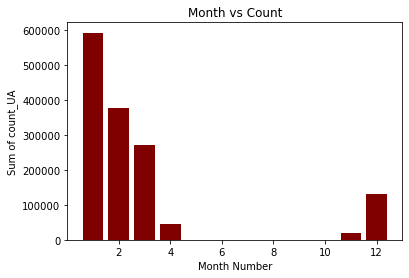

In [59]:
plt.bar([1,2,3,4,10,11,12], df_month_sum["count_UA"], color ='maroon', width = 0.8)
 
plt.xlabel("Month Number")
plt.ylabel("Sum of count_UA")
plt.title("Month vs Count")
plt.show()

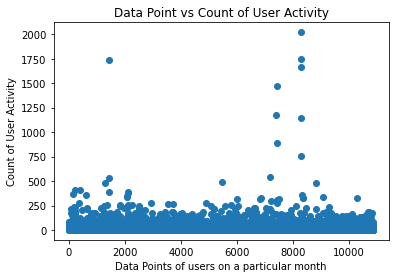

In [57]:
x = np.arange(1, 10877, 1, dtype=int)
y = df_userAct["count_UA"]
plt.scatter(x, y)
plt.xlabel("Data Points of users on a particular month")
plt.ylabel("Count of User Activity")
plt.title("Data Point vs Count of User Activity")
plt.show()

In [56]:
df_userAct["count_UA"].mean()

21.575487311511583

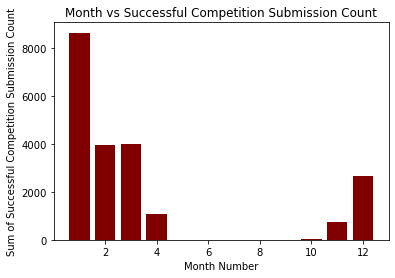

In [64]:
plt.bar([1,2,3,4,10,11,12], df_month_sum["Successful Submission Count"], color ='maroon', width = 0.8)
 
plt.xlabel("Month Number")
plt.ylabel("Sum of Successful Competition Submission Count")
plt.title("Month vs Successful Competition Submission Count")
plt.show()

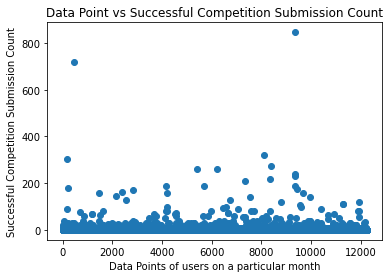

In [65]:
x = np.arange(1, 12247, 1, dtype=int)
y = df_final["Successful Submission Count"]
plt.scatter(x, y)
plt.xlabel("Data Points of users on a particular month")
plt.ylabel("Successful Competition Submission Count")
plt.title("Data Point vs Successful Competition Submission Count")
plt.show()

In [66]:
df_final["Successful Submission Count"].mean()

1.717213784092765

In [88]:
df_final["month user completed action"].unique()

array([15., 13., 11., 16., 19., 31.,  6.,  3., 29., nan, 23., 25.,  2.,
       26., 20., 30., 12., 22., 28.,  8.,  5., 17., 24., 18.,  9., 21.,
        4., 14., 10., 27.,  1.,  7.])

In [ ]:
# Day last active vs active scatter

In [ ]:
# Heat map features

In [ ]:
# Feature X, Y, A, ... with list(By topppppppppperrrrrrrrrrrrrrrrrrrrr)

In [ ]:
# Heat map with active

In [ ]:
# Count vs Active

In [ ]:
# Active vs Next Month

In [94]:
df_final = pd.read_csv("final.csv")

In [96]:
df_final.drop("Unnamed: 0", axis = 1, inplace=True)

In [97]:
df_final

,User_ID,Personal,Theme,comment_day,Participant Type,Successful Submission Count,competition_enrollment_day,FeatureA,FeatureB,FeatureC,...,competition started second,User sign-in hour,User sign-in minute,User sign-in second,Discussion Day,Time user completed action in hour,Time user completed action in minute,Time user completed action in second,Active,Next Month Active
0,ID_00E5OHGR_Month_3,-1.0,-1.0,0.0,1.0,0,15.0,[7],[2],29.0,...,0,8,29,49.568521,-1,11.0,10.0,23.0,1,0.0
1,ID_00ETFE7J_Month_3,-1.0,-1.0,0.0,1.0,10,12.0,[1],[9],2.0,...,0,20,53,4.318404,-1,23.0,41.0,28.0,1,0.0
2,ID_00HJDB09_Month_2,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,6,51,48.183997,-1,9.0,2.0,9.0,1,0.0
3,ID_00V7K62T_Month_1,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,-1,-1,-1.000000,-1,9.0,43.0,13.0,0,0.0
4,ID_00V7K62T_Month_11,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,5,47,15.776115,-1,7.0,47.0,32.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,ID_ZZQK0LU6_Month_1,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,10,22,28.618352,-1,11.0,38.0,50.0,1,0.0
12242,ID_ZZT2KLLN_Month_3,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,4,21,59.028835,-1,5.0,23.0,57.0,0,0.0
12243,ID_ZZVUJ45W_Month_2,-1.0,-1.0,0.0,1.0,0,15.0,[1],[],3.0,...,0,9,4,8.881773,-1,NaN,NaN,NaN,0,0.0
12244,ID_ZZXZVCJ8_Month_11,-1.0,-1.0,0.0,1.0,0,22.0,[1],[],35.0,...,0,12,53,31.956136,-1,14.0,53.0,44.0,0,0.0


In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   User_ID                               12246 non-null  object 
 1   Personal                              12246 non-null  float64
 2   Theme                                 12246 non-null  float64
 3   comment_day                           12246 non-null  float64
 4   Participant Type                      12246 non-null  float64
 5   Successful Submission Count           12246 non-null  int64  
 6   competition_enrollment_day            12246 non-null  float64
 7   FeatureA                              12246 non-null  object 
 8   FeatureB                              12246 non-null  object 
 9   FeatureC                              12246 non-null  float64
 10  FeatureD                              12246 non-null  float64
 11  FeatureE       

In [122]:
df_final[df_final["Active"]==1]

,User_ID,Personal,Theme,comment_day,Participant Type,Successful Submission Count,competition_enrollment_day,FeatureA,FeatureB,FeatureC,...,competition started second,User sign-in hour,User sign-in minute,User sign-in second,Discussion Day,Time user completed action in hour,Time user completed action in minute,Time user completed action in second,Active,Next Month Active
0,ID_00E5OHGR_Month_3,-1.0,-1.0,0.0,1.0,0,15.0,[7],[2],29.0,...,0,8,29,49.568521,-1,11.0,10.0,23.0,1,0.0
1,ID_00ETFE7J_Month_3,-1.0,-1.0,0.0,1.0,10,12.0,[1],[9],2.0,...,0,20,53,4.318404,-1,23.0,41.0,28.0,1,0.0
2,ID_00HJDB09_Month_2,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,6,51,48.183997,-1,9.0,2.0,9.0,1,0.0
5,ID_00XHYSFF_Month_1,-1.0,-1.0,0.0,1.0,10,2.0,[],[],-1.0,...,0,-1,-1,-1.000000,-1,23.0,56.0,29.0,1,0.0
7,ID_00XHYSFF_Month_3,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,-1,-1,-1.000000,-1,17.0,49.0,38.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12223,ID_ZXJMSN81_Month_12,-1.0,-1.0,0.0,1.0,0,7.0,[1],[],35.0,...,0,13,17,54.696108,-1,15.0,35.0,1.0,1,0.0
12224,ID_ZXLXP8AS_Month_1,-1.0,-1.0,0.0,1.0,9,5.0,[1],[9],8.0,...,0,-1,-1,-1.000000,-1,NaN,NaN,NaN,1,0.0
12233,ID_ZYH5TA02_Month_12,-1.0,-1.0,0.0,0.0,0,0.0,-1,-1,-1.0,...,-1,8,59,11.937322,-1,16.0,9.0,29.0,1,0.0
12240,ID_ZZDBLYS5_Month_2,-1.0,-1.0,0.0,1.0,0,12.0,[1],[9],2.0,...,0,13,58,31.617677,-1,15.0,13.0,55.0,1,0.0


In [110]:
df_final["Successful Submission Count"].unique()

array([  0,  10,  20,  40,  28, 304,  90,  30,   8, 180,  27,  29,   6,
       720,   7,  78,   9,  60,   5,  70,  19, 160,  63,  15,   3,  12,
        80,  24, 144, 162, 130, 170,  36,  18,  13,  50,  26,  49,  16,
       190, 100,  72, 260,  92,  96,  54, 210,  17, 140,  35,  52, 320,
        48, 217, 272, 120,  32,  56, 846, 231, 240,   4, 176, 108,  64,
        66, 110,  14], dtype=int64)

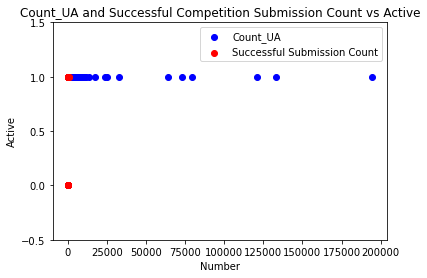

In [117]:
y = df_final["Active"]
x1 = df_final["count_UA"]
x2 = df_final["Successful Submission Count"]
plt.scatter(x1, y, c="blue", label="Count_UA")
plt.scatter(x2, y, c="red", label="Successful Submission Count")
plt.xlabel("Number")
plt.yticks([-0.5, 0, 0.5, 1, 1.5])
plt.ylabel("Active")
plt.legend()
plt.title("Count_UA and Successful Competition Submission Count vs Active")
plt.show()

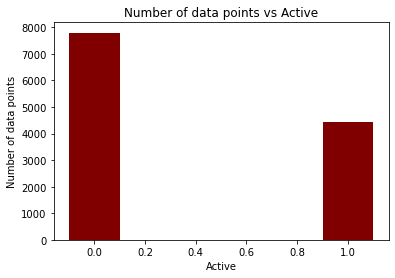

In [118]:
plt.bar([1,0], [4450, 7795], color ='maroon', width = 0.2)
 
plt.xlabel("Active")
plt.ylabel("Number of data points")
plt.title("Number of data points vs Active")
plt.show()